# Heart Disease Prediction and Risk Identification

### Introduction:

This file represents the python code for the task **Heart Disease Predictions and Risk Identification** which aims at identifying whether there's a risk of Heart disease for elderly based on health indicators (collected from sesonrs) and other factors. The file includes data loading, data cleaning, data exploration, feature engineering, feature selection and feature scaling, model training and evaluation.

### Libraries Import and Data Load:

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.regularizers import l2
from scipy.stats import mstats
import warnings
warnings.filterwarnings('ignore')
# Set the style of the plot
sns.set(style="whitegrid")

In [3]:
my_data = pd.read_csv("ECG-Dataset.csv")

#### Exploratory Data Analysis:

In [4]:
my_data.info()
my_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        333 non-null    int64  
 1   sex        333 non-null    int64  
 2   smoke      333 non-null    int64  
 3   years      333 non-null    int64  
 4   ldl        333 non-null    float64
 5   chp        333 non-null    int64  
 6   height     333 non-null    int64  
 7   weight     333 non-null    float64
 8   fh         333 non-null    int64  
 9   active     333 non-null    int64  
 10  lifestyle  333 non-null    int64  
 11  ihd        333 non-null    int64  
 12  hr         333 non-null    int64  
 13  dm         333 non-null    int64  
 14  bpsys      333 non-null    int64  
 15  bpdias     333 non-null    int64  
 16  htn        333 non-null    int64  
 17  ivsd       333 non-null    int64  
 18  ecgpatt    333 non-null    int64  
 19  qwave      333 non-null    int64  
 20  target    

,age,sex,smoke,years,ldl,chp,height,weight,fh,active,...,ihd,hr,dm,bpsys,bpdias,htn,ivsd,ecgpatt,qwave,target
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,...,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,55.117117,0.534535,0.195195,4.798799,112.926246,2.885886,162.102102,82.157357,0.237237,0.369369,...,0.255255,83.882883,0.231231,123.618619,74.879880,0.516517,0.282282,3.315315,0.078078,0.354354
std,14.159210,0.499557,0.396947,11.249835,37.972983,1.032110,11.295127,15.392197,0.426029,0.483360,...,0.436661,14.633107,0.422254,21.341639,12.681834,0.500479,0.450787,0.981596,0.268698,0.479037
min,20.000000,0.000000,0.000000,0.000000,26.000000,1.000000,128.000000,41.000000,0.000000,0.000000,...,0.000000,40.000000,0.000000,80.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.000000,86.200000,2.000000,153.000000,72.000000,0.000000,0.000000,...,0.000000,74.000000,0.000000,110.000000,70.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,57.000000,1.000000,0.000000,0.000000,110.000000,3.000000,162.000000,81.000000,0.000000,0.000000,...,0.000000,84.000000,0.000000,120.000000,70.000000,1.000000,0.000000,4.000000,0.000000,0.000000
75%,67.000000,1.000000,0.000000,0.000000,137.000000,4.000000,171.000000,90.300000,0.000000,1.000000,...,1.000000,91.000000,0.000000,135.000000,80.000000,1.000000,1.000000,4.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,50.000000,260.000000,4.000000,192.000000,134.000000,1.000000,1.000000,...,1.000000,140.000000,1.000000,220.000000,140.000000,1.000000,1.000000,4.000000,1.000000,1.000000


The data has no missing values.

#### Filter data by age:

As the dataset is not big (around 330 observations), we will reduce the minimum age to be considered as 35 years.

In [5]:
data_v1 = my_data[my_data.age >= 35]
data_v1.shape

(306, 21)

### Exploratory Data Anlaysis:

Now we will plot the distributions of the continuous features.

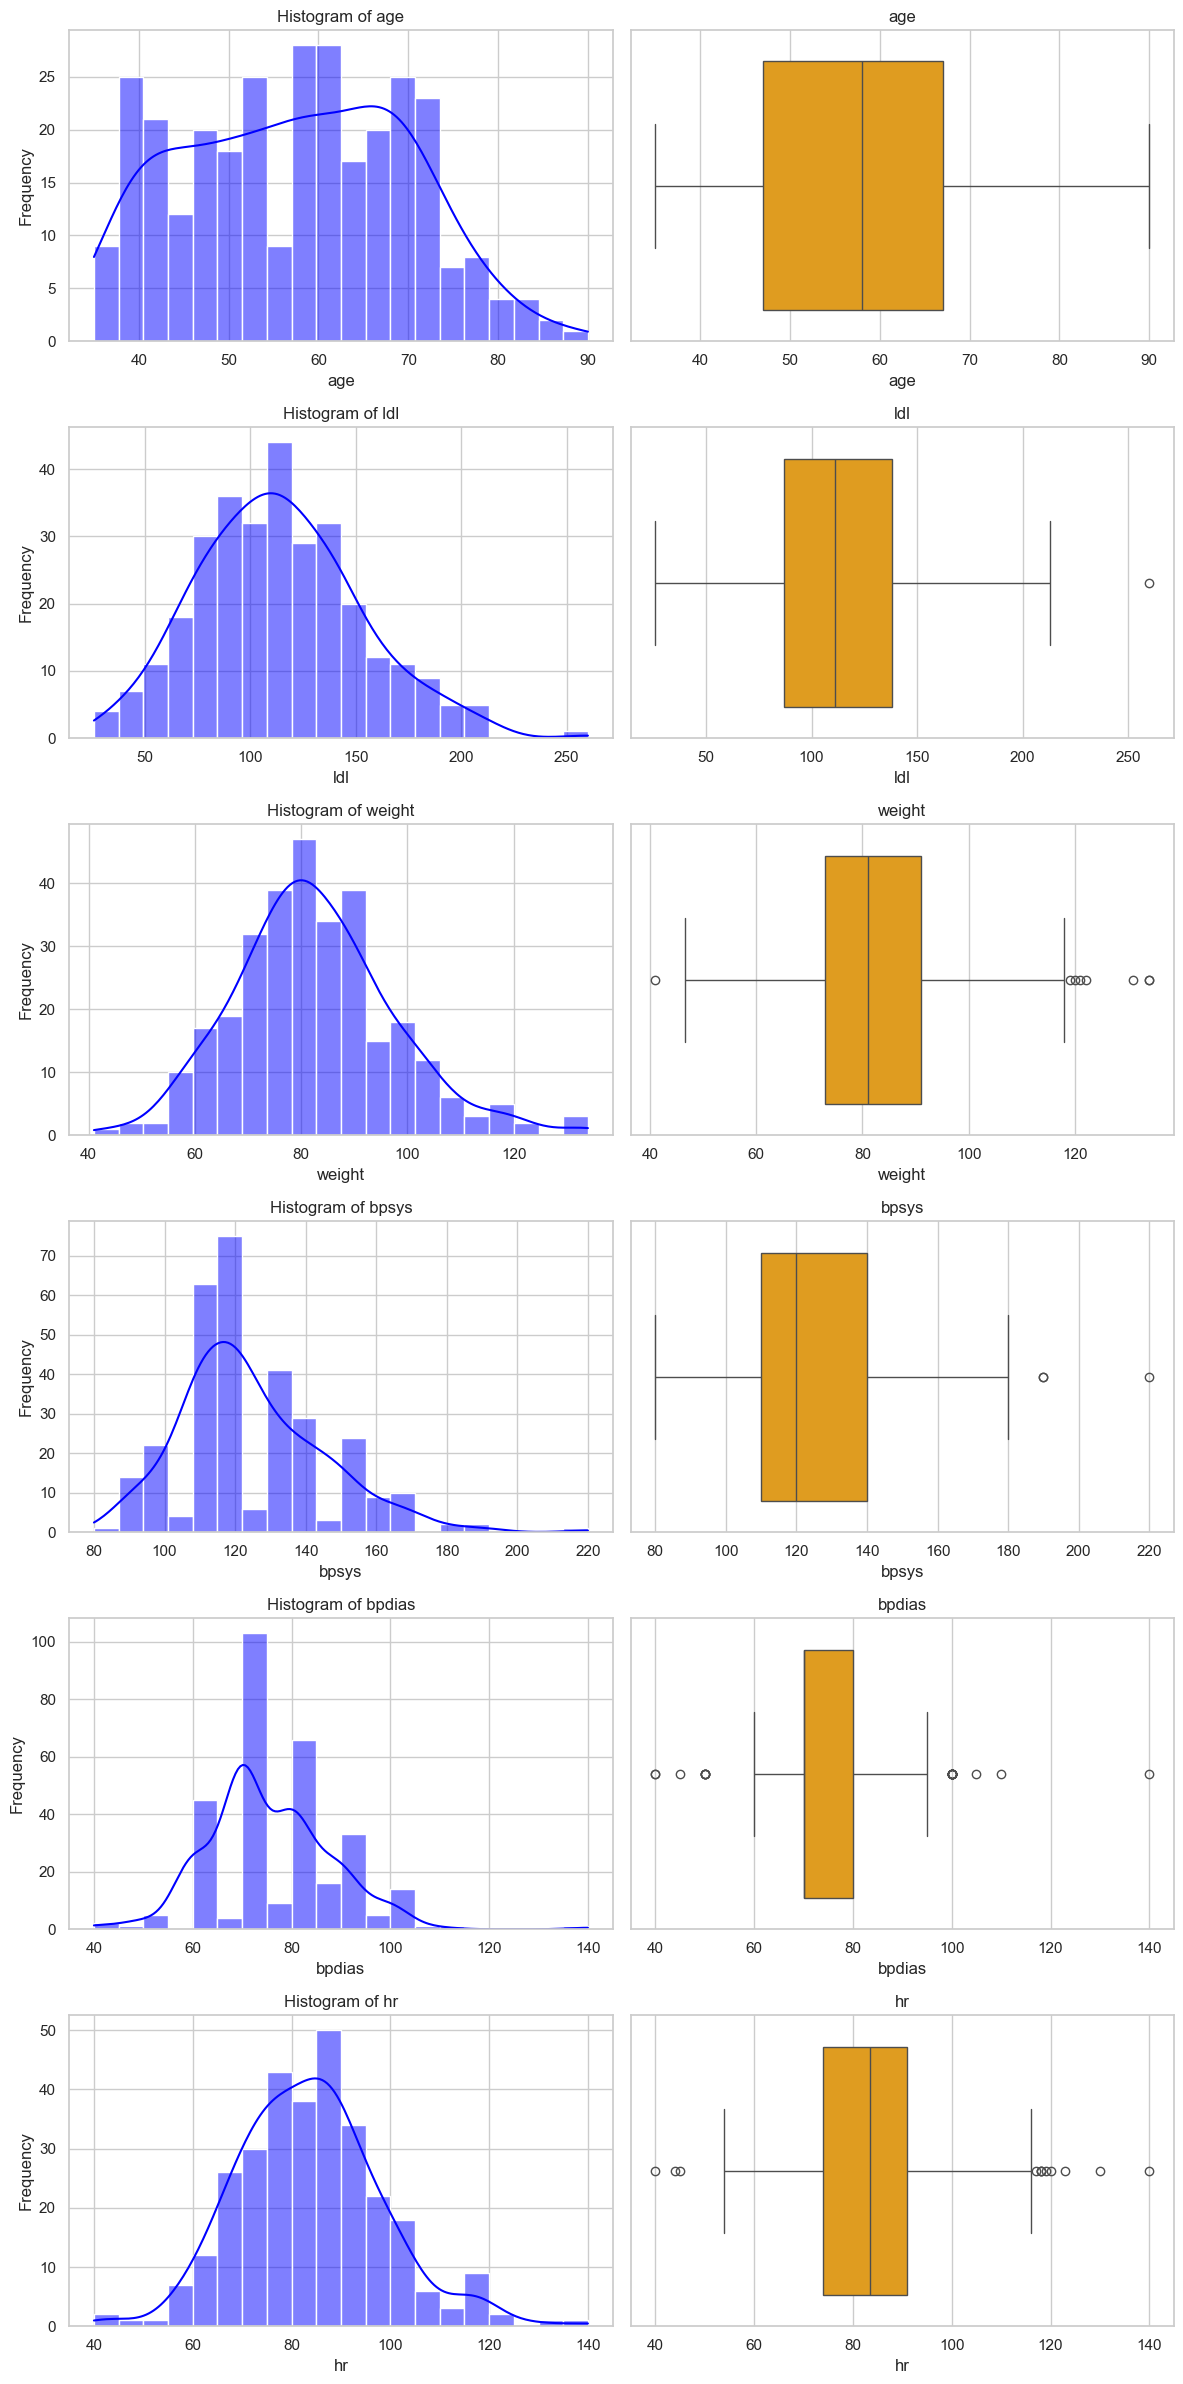

In [6]:
# features to plot
to_plot = ['age', 'ldl', 'weight', 'bpsys', 'bpdias', 'hr']

# Number of features to plot
num_features = 6

# we want to create a 6x2 grid for up to 6 features
rows = 6  # One row for each feature
cols = 2  # One histogram and one boxplots for each feature

# creating a figure
plt.figure(figsize=(12, 4 * rows))

# Iterate through the selected features and plot histograms and boxplots
for i, feature in enumerate(to_plot):
    # Plot histogram
    plt.subplot(num_features, cols, i * cols + 1)
    sns.histplot(data_v1[feature], bins=20, kde=True, color='blue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # Plot boxplot
    plt.subplot(num_features, cols, i * cols + 2)
    sns.boxplot(x=data_v1[feature], color='orange')
    plt.title(f'{feature}')
    plt.xlabel(feature)
    
plt.tight_layout()
plt.show()

#### Handling Outliers:

It is noticeable that there are some outliers on some of these features. We will use different approaches to deal with them.
for Cholesterol and blood pressure systolic, we will replace outliers by the 95th percentile of the data since they only one or two outliers.

In [7]:
# make another version of the data
data_v2 = data_v1.copy()

In [8]:
def handle_high_outliers(data, feature, upper_limit):
    """
    Cap the very high values for the specified feature to an upper limit
    """
    data[feature] = data[feature].clip(upper=upper_limit)

# Cap Cholesterol 'ldl' at 214
handle_high_outliers(data_v2, 'ldl', 214)

# Cap Blood pressure systolic 'bpsys' at 180
handle_high_outliers(data_v2, 'bpsys', 180)

For weight, blood pressure diastolic, and heart rate, we will apply winsorization to cape the extreme values at the upper and lower bounds (5th and 95th percentiles). 

In [9]:
# Apply winsorization to 'weight'
data_v2['weight'] = mstats.winsorize(data_v2['weight'], limits=[0.05, 0.05])
# Apply winsorization to blood pressure diastolic 'bpdias'
data_v2['bpdias'] = mstats.winsorize(data_v2['bpdias'], limits=[0.05, 0.05])
# Apply winsorization to heart rate 'hr'
data_v2['hr'] = mstats.winsorize(data_v2['hr'], limits=[0.05, 0.05])

checking the distributions again.

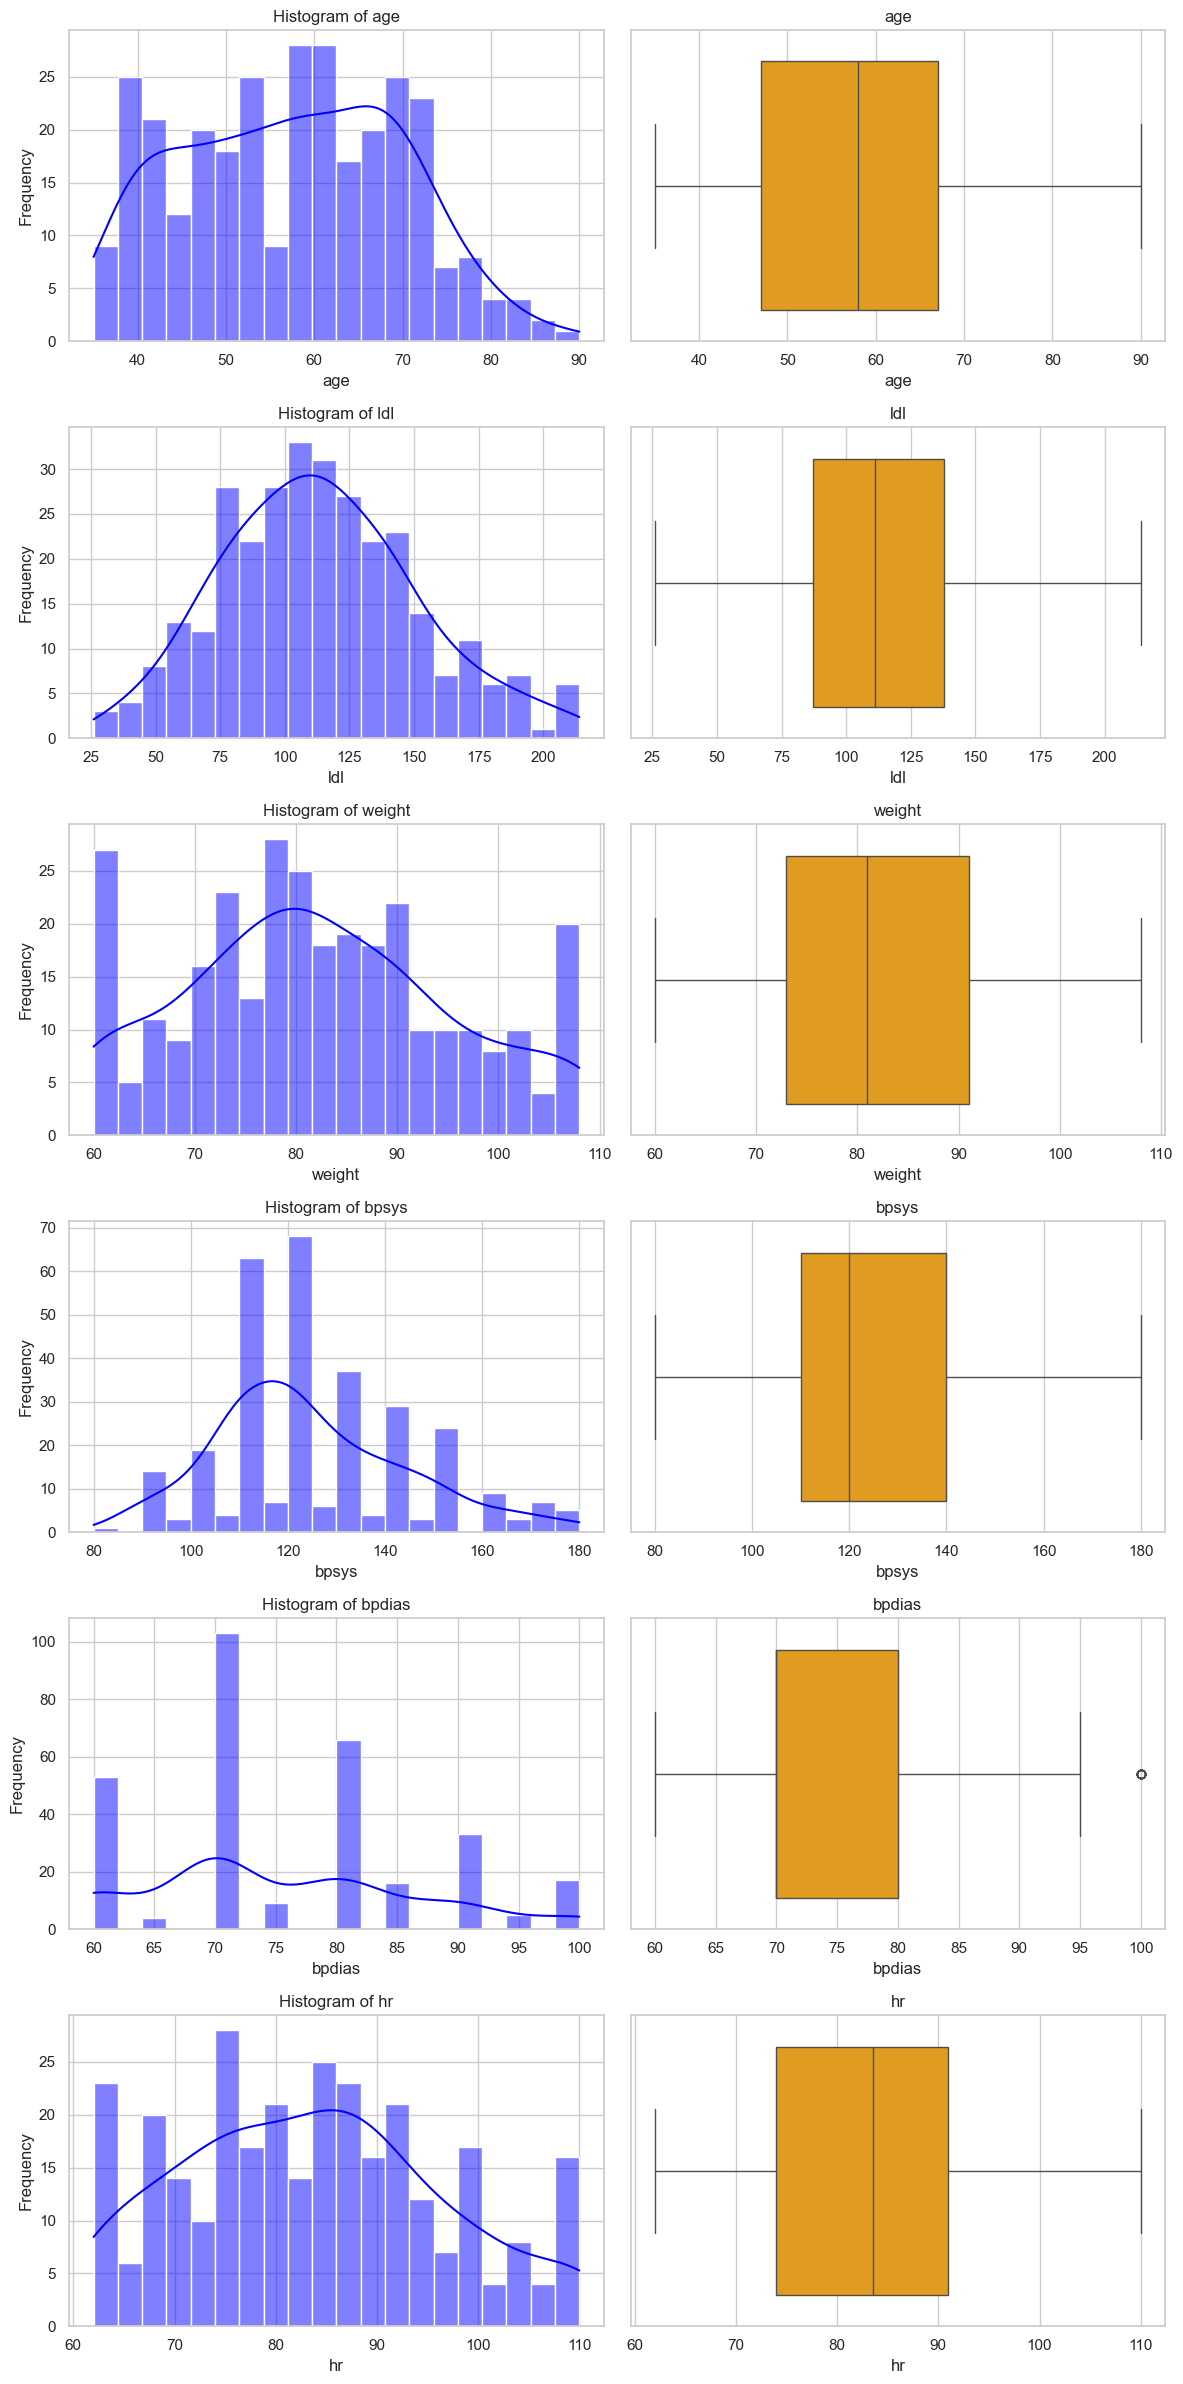

In [11]:
# features to plot
to_plot = ['age', 'ldl', 'weight', 'bpsys', 'bpdias', 'hr']

# Number of features to plot
num_features = 6

# we want to create a 6x2 grid for up to 6 features
rows = 6  # One row for each feature
cols = 2  # One histogram and one boxplots for each feature

# creating a figure
plt.figure(figsize=(12, 4 * rows))

# Iterate through the selected features and plot histograms and boxplots
for i, feature in enumerate(to_plot):
    # Plot histogram
    plt.subplot(num_features, cols, i * cols + 1)
    sns.histplot(data_v2[feature], bins=20, kde=True, color='blue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # Plot boxplot
    plt.subplot(num_features, cols, i * cols + 2)
    sns.boxplot(x=data_v2[feature], color='orange')
    plt.title(f'{feature}')
    plt.xlabel(feature)
    
plt.tight_layout()
plt.show()

There is only one outlier left in 'bpdias'. we will use the 'handle_high_outliers_function' to cape the high value.

In [12]:
# Cap Blood pressure diastolic 'bpdias' at 95
handle_high_outliers(data_v2, 'bpdias', 95)

#### Explore categorical variables:

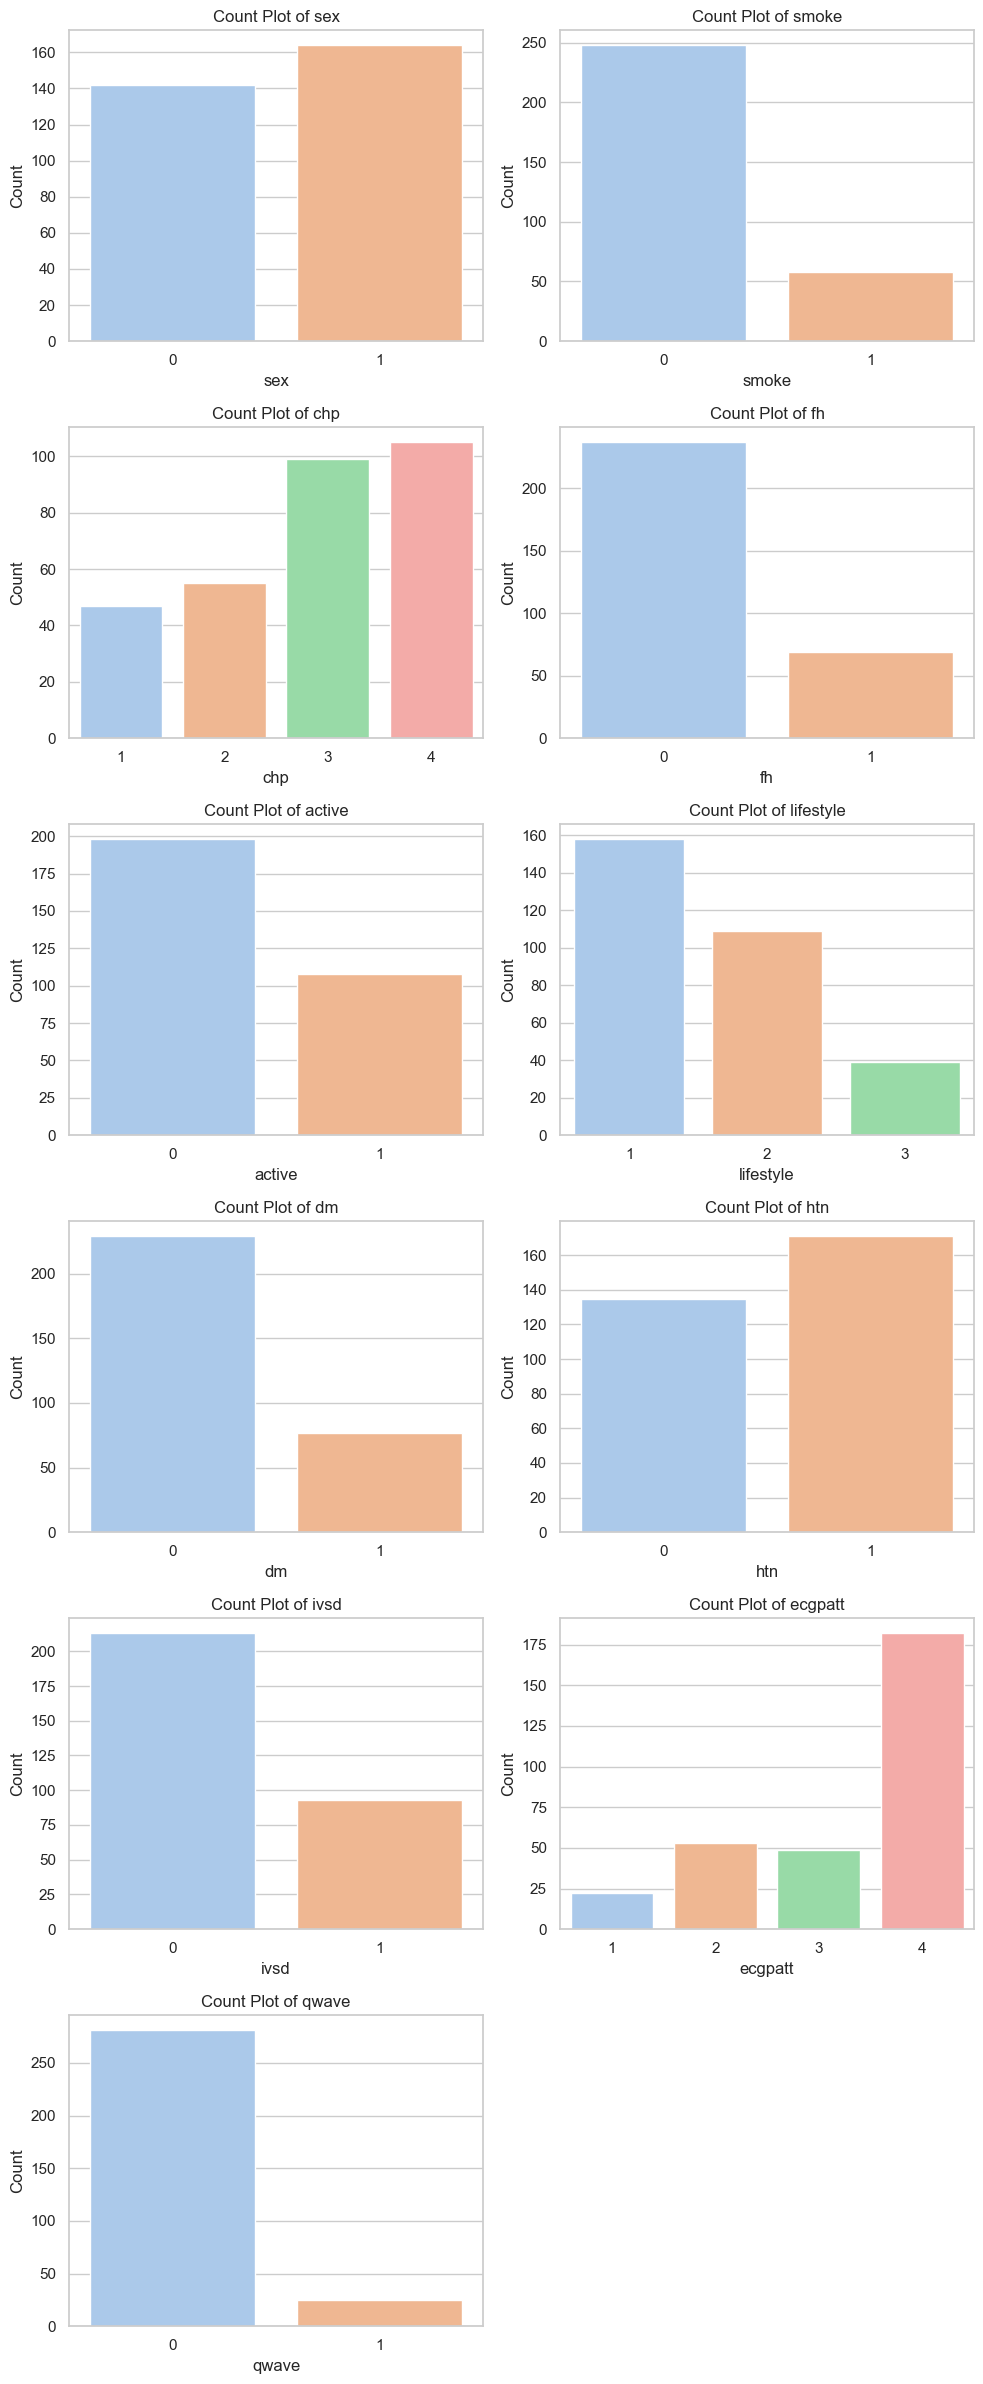

In [13]:
# features to explore
categorical_features = ['sex', 'smoke', 'chp', 'fh', 'active', 'lifestyle', 'dm', 'htn', 'ivsd', 'ecgpatt', 'qwave']

# Set the color palette for the plots
palette = sns.color_palette('pastel')

# plot 2 column grid
num_features = 11
rows = 6  # (num_features // 2) + (num_features % 2)
cols = 2  # Two plots per row

# creating a figure
plt.figure(figsize=(10, 4 * rows))

# Iterate through each categorical feature
for i, feature in enumerate(categorical_features):
    # Plotting the bar plot using a count plot with the specified palette
    plt.subplot(rows, cols, i + 1)
    sns.countplot(x=feature, data=data_v2, palette=palette)
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Clearly, some features like 'smoke' and 'qwave' are imbalanced. we will see their effects on the target later using correlation matrix.

##### Feature engineering:

Now, we will engineer a new feature 'Sys-Dias' which is a fucntion of 'bpdias' and 'bpsys'. 

In [14]:
data_v2['Sys-Dias'] = data_v2['bpsys'] - data_v2['bpdias'] + data_v2['bpsys']/data_v2['bpdias']

#### Correlation Analysis:

In this phase, we are going to plot a correlation heatmap to check the relationships between features and target.

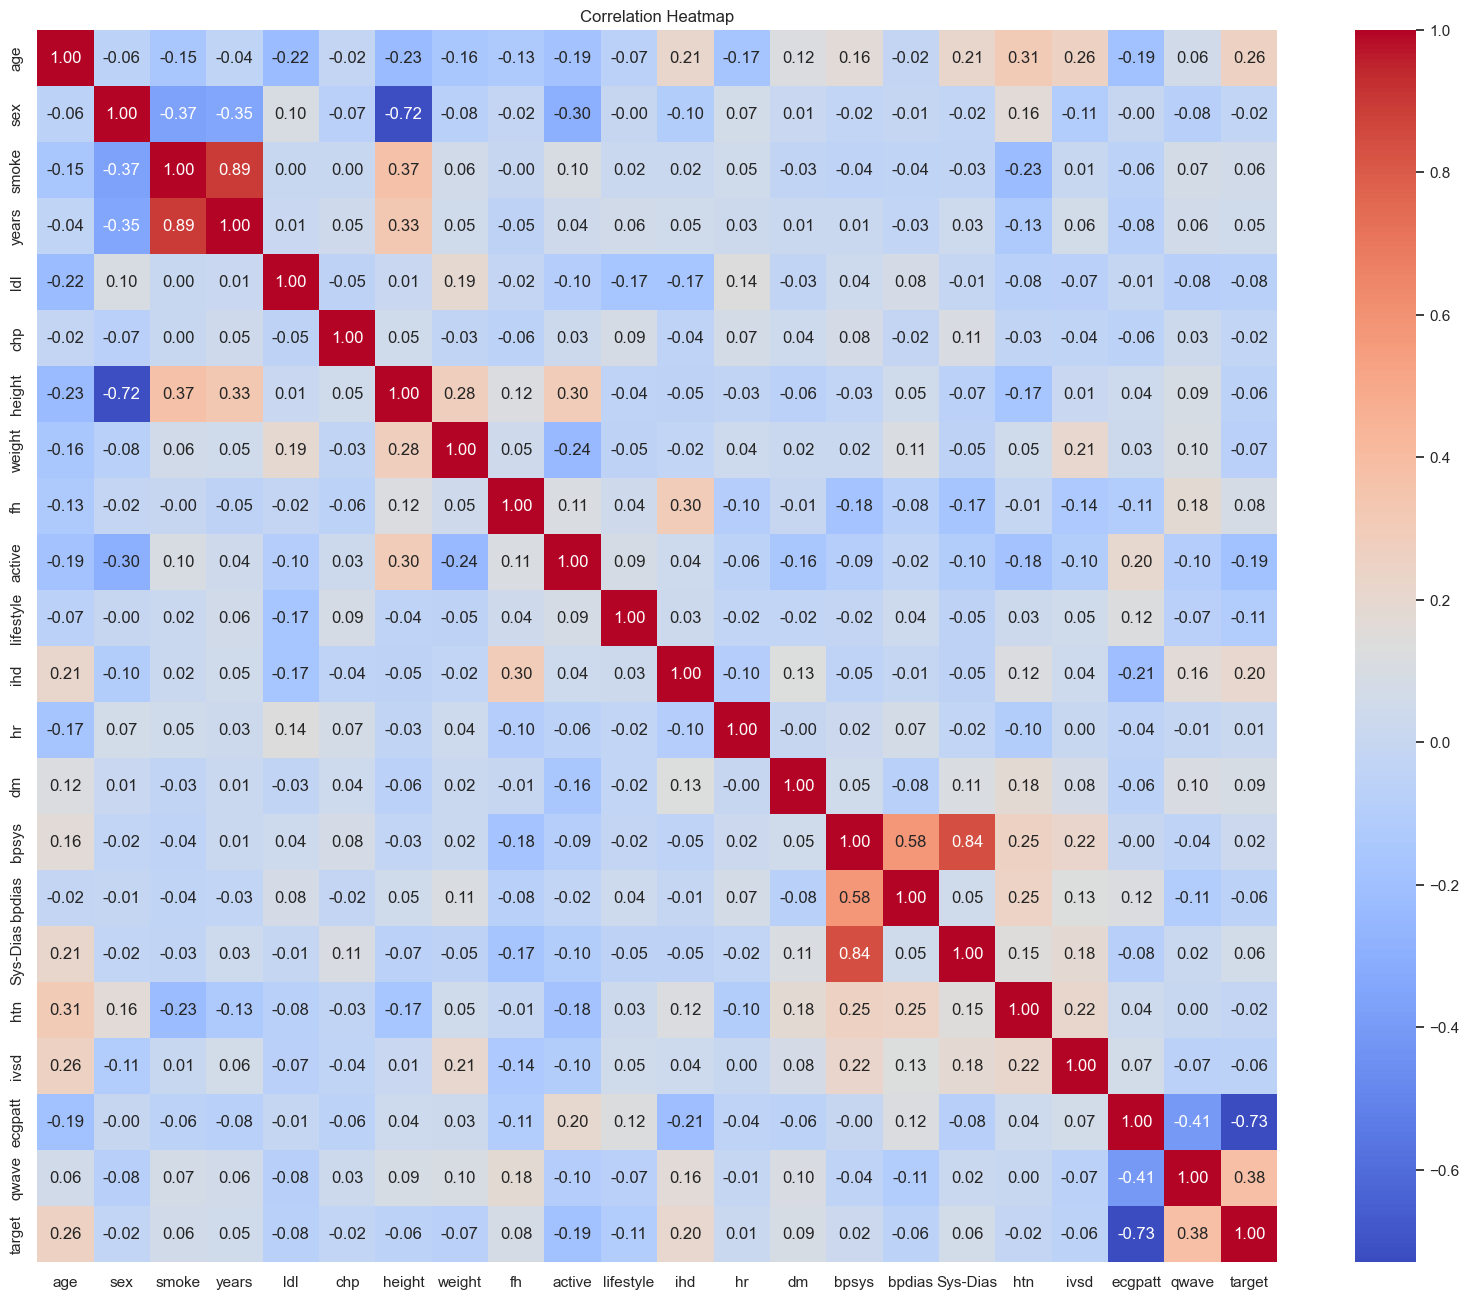

In [15]:
corr_matrix = data_v2[['age', 'sex', 'smoke', 'years', 'ldl', 'chp', 'height', 'weight', 'fh',
       'active', 'lifestyle', 'ihd', 'hr', 'dm', 'bpsys', 'bpdias', 'Sys-Dias','htn',
       'ivsd', 'ecgpatt', 'qwave', 'target']].corr()

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The graph reveals interesting results. 'ecgpatt' has the highest correlation with the target (0.73). There are some weak correlations with the target including 'qwave' (0.38), 'age' (0.26), 'ihd' (0.2), and 'active' (0.19).

On the other hand, there are a lot of null correlations with th target. We will consider that in the feature selection phase.

#### Feature selection:

We are going to select only the important features and leave the ones which are not correlated with the target to avoid overfitting. (Non-correlated features might have bad impact on the models).

In [25]:
data_v3 = data_v2[['age', 'active', 'lifestyle', 'ihd', 'dm', 'ecgpatt', 'qwave', 'target']]

#### Data Splitting and Scaling:

Here, we split data into features and target and then into training and testing. We should not forget to scale the features before modeling. we will apply standard scaler.

In [26]:
# split the data into features and target
X = data_v3.drop('target', axis=1)
y = data_v3['target']

# apply StandardScaler to the features
scaler = StandardScaler()
X.iloc[:, :-1] = scaler.fit_transform(X.iloc[:, :-1])

# split data into training (70%) and testing data (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#### Building Predictive Models:

In this section, we will build different ML models to predict the heart disease status based on the selected features. At first we will train few models with default hyperparameters and evaluate them.

In [27]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

for name, model in models.items():
    print(f"Training {name} Model:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Training Logistic Regression Model:
Logistic Regression Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        59
           1       0.92      0.67      0.77        33

    accuracy                           0.86        92
   macro avg       0.88      0.82      0.83        92
weighted avg       0.87      0.86      0.85        92

Training Decision Tree Model:
Decision Tree Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.97      0.97      0.97        33

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92

Training Random Forest Model:
Random Forest Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.97      1.00      0.99     

The ensemble models (Random Forest, Gradient Boosting, AdaBoost) have very high accuracy, They might overfit the training data.

We will use simpler models with Regularization to avoid overfitting.
We will train a **logistic regression** with ***L2** regularization* and **Support Vector Machine**.

#### 1. Logistic Regression:

We will use a logistic regression model with regularization to avoid overfitting. We will tune the hyperparameter 'C' using 'Grid Search'.

In [63]:
lr_param_grid = { 'C': [0.01, 0.03, 0.05, 0.07, 0.1, 0.3, 0.5, 0.7] } 

lr_grid_search = GridSearchCV(estimator=LogisticRegression(penalty='l2'), param_grid=lr_param_grid, cv=5, scoring='accuracy')

lr_grid_search.fit(X_train, y_train)
# print the best hyperparameter
print("Best Hyperparameters:", lr_grid_search.best_params_)

Best Hyperparameters: {'C': 0.3}


Accuracy: 0.86%
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90        59
           1       0.92      0.67      0.77        33

    accuracy                           0.86        92
   macro avg       0.88      0.82      0.83        92
weighted avg       0.87      0.86      0.85        92


Coefficients:
 [[ 0.3210939  -0.14691175 -0.02846945  0.0694741   0.13581121 -1.70249085
   0.89010652]]


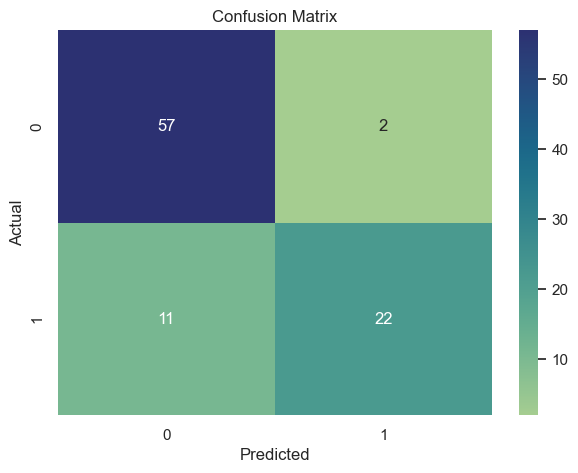

In [65]:
# train and fit logistic regression with the best parameter for C
lr = LogisticRegression(penalty='l2', C=0.3)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# evaluate model performance
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)))
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# print the coefficients
print("\nCoefficients:\n", lr.coef_)

# Define a custom color palette
cm_palette = sns.color_palette("crest", as_cmap=True)

# Plot confusion matrix heatmap
lr_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(lr_cm, annot=True, cmap=cm_palette, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

So here is a summary report of the evaluation:

* we got 86% accuracy using Logistic Regression.
* the last two features ('ecgpatt', 'qwave') is much more important in the predictions than the others.
* by looking at the confusion matrix and classification report, we conclude that there are some true labels (10) where the model is unable to predict them correctly (this might be to class imbalance).


So, we will also set the 'class_weight' parameter to balanced.

Accuracy: 0.96%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        59
           1       0.94      0.94      0.94        33

    accuracy                           0.96        92
   macro avg       0.95      0.95      0.95        92
weighted avg       0.96      0.96      0.96        92


Coefficients:
 [[ 0.31623954 -0.12573087 -0.03711392  0.08478101  0.09755336 -1.8956314
   0.90642321]]


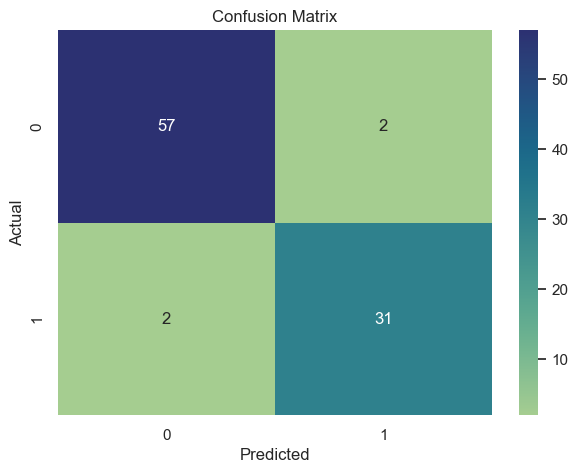

In [66]:
# train and fit logistic regression with the best parameter for C
lr = LogisticRegression(penalty='l2', C=0.3, class_weight = 'balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# evaluate model performance
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)))
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# print the coefficients
print("\nCoefficients:\n", lr.coef_)

# Define a custom color palette
cm_palette = sns.color_palette("crest", as_cmap=True)

# Plot confusion matrix heatmap
lr_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(lr_cm, annot=True, cmap=cm_palette, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Now we have much better model with 96% accuracy and 96% f1 score.

#### 2. Support Vector Machine:

Now, we train SVM as it is also a simple model. We will tune the hyper-parameters, However, we only use small values for C to enhance regularization and reduce overfitting.

In [53]:
svm_param_grid = {
    'C': [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
    'kernel': ['linear', 'rbf', 'poly']
}

svm_grid_search = GridSearchCV(estimator=SVC(), param_grid=svm_param_grid, cv=5, scoring='accuracy')

svm_grid_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best Hyperparameters:", svm_grid_search.best_params_)

Best Hyperparameters: {'C': 0.1, 'kernel': 'linear'}


Accuracy: 0.96%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97        59
           1       0.91      0.97      0.94        33

    accuracy                           0.96        92
   macro avg       0.95      0.96      0.95        92
weighted avg       0.96      0.96      0.96        92



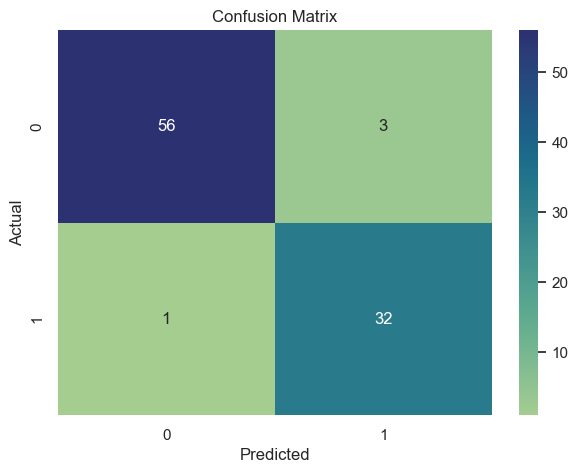

In [59]:
# train and fit logistic regression with the best parameter for C
svc = SVC(kernel='linear', C=0.1)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

# evaluate model performance
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)))
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


# Define a custom color palette
cm_palette = sns.color_palette("crest", as_cmap=True)

# Plot confusion matrix heatmap
svc_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(svc_cm, annot=True, cmap=cm_palette, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model achieved high accuracy of 96%, with 96% f1 score.

Interestingly, the model is able to predict 97% of the positive cases, which means that, when there is a **Heart Disease Risk**, the model will have 0.97 probability of predicting **presence of heart disease risk.**

### Conclusion:on:

In this analysi**s of Heart Disease Risk for El**derly, we navigated through various stages of data preprocessing, exploratory data analysis, feature engineering, and predictive modeling to gain insights and develop accurate prediction models.

Initially, we encountered the challenge of working with a relatively small dataset. To address this limitation, we adopted strategies such as reducing the minimum age threshold to 35 to include more data points. Additionally, we employed simple models with regularization techniques to mitigate the risk of overfitting, a common concern with small datasets.

Following data preprocessing and feature engineering, we explored the data comprehensively, identifying patterns and relationships crucial for predictive modeling. Feature selection and scaling further refined our dataset, enhancing the effectiveness of subsequent modeling efforts.

We built predictive models using both Support Vector Machines (SVM) and Logistic Regression, employing cross-validation and hyperparameter tuning to optimize model performance. Through meticulous evaluation, we achieved an outstanding accuracy of 96% on the testing data for both SVM and Logistic Regression models.

Moreover, our SVM model demonstrated exceptional predictive capability specifically for identifying individuals at risk, achieving a remarkable 97% accuracy in predicting risk cases. This highlights the practical utility of our models in identifying and potentially preventing heart disease risk among the elderly population.

Overall, our approach underscores the importance of thoughtful data preprocessing, feature engineering, and model selection tailored to the specific characteristics and challenges of the dataset. The robust performance of our models serves as a testament to the effectiveness of these methodologies in accurately predicting heart disease risk, ultimately contributing to improved healthcare outcomes for elderly individuals.